# 1D linear regression

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#Initialazing variables
m = 100
x = np.linspace(0, 10, m).reshape((m, 1)) 
y = np.matrix(x + np.random.randn(m, 1))
x = np.matrix(np.hstack((np.ones((m,1)),x)))
beta = np.random.rand(2,1)
itterations = 1000;
alpha = 0.03;
J_history = np.zeros((itterations,1))


def cost(beta):
        h = x*beta
        error = h-y
        J = 1/(2*m)*np.dot(error.transpose(),error)
        return  J


def gradient(x,y,beta):
    grad = (1/m) * (x.transpose()) * (x*beta-y)
    return grad

def gradientDescent(x,y,alpha,beta,itterations):
    for i in range(itterations):
        beta = beta - alpha*gradient(x,y,beta)
        J_history[i] = cost(beta) 
    return beta,J_history

# Solution

In [26]:
optimal_beta,J_history = gradientDescent(x,y,alpha,beta,itterations)
minimal_cost = cost(optimal_beta)
print('\u03B20=', optimal_beta[0], ',\u03B21=',optimal_beta[1],'\nJ(\u03B20,\u03B21)=',minimal_cost)

β0= [[0.11963282]] ,β1= [[0.97293654]] 
J(β0,β1)= [[0.44146884]]


# Plot of the cost function according to number of itterations

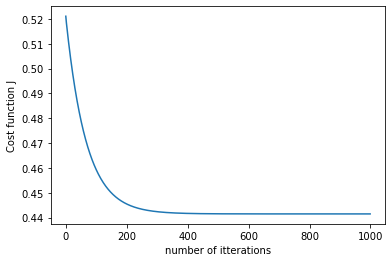

In [27]:
plt.plot(J_history)
plt.xlabel('number of itterations')
plt.ylabel('Cost function J')
plt.show()

# Plot of fitting line and the data

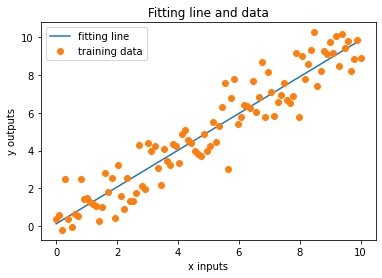

In [19]:
plt.plot(x[:,1],x*optimal_beta,label='fitting line')
plt.xlabel('x inputs')
plt.ylabel('y outputs')
plt.title('Fitting line and data')
plt.plot(x[:,1], y, 'o',label='training data')
plt.legend()

# Performance of regression

In [20]:
y_variance = len(y)*np.var(y)
sum_squared_errors = (2*m)*cost(optimal_beta)
Performance = 1 - ( sum_squared_errors )/(y_variance)
print('The performance R is ',Performance) 

The performance R is  [[0.90114675]]


# 3D plot of the cost function 

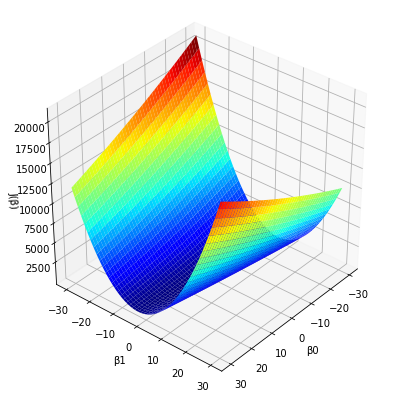

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
n = 200
Xs, Ys = np.meshgrid(np.linspace(-30, 30, n), np.linspace(-30, 30, n))
Zs = np.array([cost(np.matrix( (t0, t1) ).T) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel('\u03B20')
ax.set_ylabel('\u03B21')
ax.set_zlabel('J(\u03B2) ')
ax.view_init(elev=35, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.jet,alpha=1) # colormap : jet , alpha : degree of transparency (0-1)

# Contour plot of the cost function

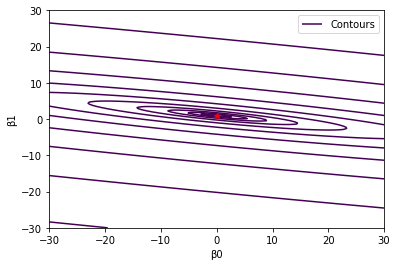

In [22]:
ax = plt.figure().gca()
sol = ax.plot(optimal_beta[0], optimal_beta[1], 'r*',label="Optimal solution")
ax.set_xlabel('\u03B20')
ax.set_ylabel('\u03B21')
cntr = plt.contour(Xs, Ys, Zs, np.logspace(-10, 10, 50))
h1,_ = cntr.legend_elements()
ax.legend([h1[0]], ['Contours'])

# Predict a value

In [23]:
input = 20
print('input value :',input,'\nPredicted output :',np.matrix((1,input))*optimal_beta)

input value : 20 
Predicted output : [[19.57836372]]


# Normal equation using QR decomposition

In [25]:
X = x
Q, R = np.linalg.qr(X)
invR = np.linalg.inv(R)
Qt = Q.T
thetaNormal = invR*Qt*y
print('Gradient descent:',thetaNormal[0],thetaNormal[1],'\nNormal euqation: ',optimal_beta[0],optimal_beta[1])


Gradient descent: [[0.11918074]] [[0.97300452]] 
Normal euqation:  [[0.11963282]] [[0.97293654]]


100